In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select the years
#selected_years = '2020'

# Select the years, separate years by |
selected_years = '2010'

# Make selected years every single year from 1985-2024
#selected_years = "1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023|2024"

# Change name so that it is easier to read, when plotting
def change_name(name):
    years = name.split("|")
    print(len(years))
    
    # Make it that the years are split by comma, with last year having 'and' before it.
    if len(years) == 0:
        name = "No year selected"
    elif len(years) == 1:
        name = years[0]
    elif len(years) == 2:
        name = years[0] + " and " + years[1]
    else:
        name = f"{years[0]} - {years[-1]}"
    
    return name

plot_names = change_name(selected_years)
plot_names

1


'2010'

In [3]:
# Load abc_islands.txt
data = pd.read_csv('abc_islands.txt', sep='\t', header=None)
first_14 = data.head(14)
first_14

,0
0,Name:
1,"Aruba, Curacao, and Bonaire"
2,Polygon Middle Longitude:
3,-69.1250
4,Polygon Middle Latitude:
5,12.3000
6,Averaged Maximum Monthly Mean:
7,28.0193
8,Averaged Monthly Mean (Jan-Dec):
9,26.0513 25.7105 25.8407 26.1299 26.5562 26.996...


In [4]:
# Retrieve the 7th line of first_14
average_mmm = float(first_14.iloc[7][0])
bleaching_threshold = average_mmm + 1
average_mmm, bleaching_threshold

(28.0193, 29.0193)

In [5]:
# Monthly Means
monthly_means = first_14.iloc[9][0].split(" ")

# Add the months to the monthly_means list From January -> December
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_means = dict(zip(months, monthly_means))
monthly_means

{'January': '26.0513',
 'February': '25.7105',
 'March': '25.8407',
 'April': '26.1299',
 'May': '26.5562',
 'June': '26.9960',
 'July': '26.9964',
 'August': '27.6958',
 'September': '28.0193',
 'October': '28.0135',
 'November': '27.7480',
 'December': '26.8304'}

In [6]:
data.head()

,0
0,Name:
1,"Aruba, Curacao, and Bonaire"
2,Polygon Middle Longitude:
3,-69.1250
4,Polygon Middle Latitude:


In [7]:
# Get a dataframe of the values of every item past the 14th row
sst_data = data.iloc[14:]
sst_data.head()

,0
14,YYYY MM DD SST_MIN SST_MAX SST@90th_HS SSTA@90...
15,1985 01 01 25.6800 26.1900 25.9900 -0.4074...
16,1985 01 02 25.4600 26.1000 25.6200 -0.0381...
17,1985 01 03 25.3100 26.0300 25.9000 -0.6642...
18,1985 01 04 24.3600 26.3700 26.2200 -0.4190...


In [8]:
# Split the sst_data
for i in range(len(sst_data)):
    sst_data.iloc[i][0] = re.split(r'\s+', sst_data.iloc[i][0].strip())

sst_data = sst_data[0].apply(pd.Series)
sst_data.head()

,0,1,2,3,4,5,6,7,8,9
14,YYYY,MM,DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max
15,1985,01,01,25.6800,26.1900,25.9900,-0.4074,0.0000,0.0000,0
16,1985,01,02,25.4600,26.1000,25.6200,-0.0381,0.0000,0.0000,0
17,1985,01,03,25.3100,26.0300,25.9000,-0.6642,0.0000,0.0000,0
18,1985,01,04,24.3600,26.3700,26.2200,-0.4190,0.0000,0.0000,0


In [9]:
# Create a Column at the start of the dataframe with date YYYY-MM-DD
dates = []
for i in range(len(sst_data)):
    dates.append(f"{sst_data.iloc[i][0]}-{sst_data.iloc[i][1]}-{sst_data.iloc[i][2]}")

sst_data.insert(0, 'Date', dates)

# Delete YYYY, MM, and DD columns
sst_data = sst_data.drop(columns=[0, 1, 2])

# Convert the top row to the column names
sst_data.columns = sst_data.iloc[0]

# Delete the top row from the dataframe
sst_data = sst_data.drop([14])

sst_data.head()

14,YYYY-MM-DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max
15,1985-01-01,25.6800,26.1900,25.9900,-0.4074,0.0000,0.0000,0
16,1985-01-02,25.4600,26.1000,25.6200,-0.0381,0.0000,0.0000,0
17,1985-01-03,25.3100,26.0300,25.9000,-0.6642,0.0000,0.0000,0
18,1985-01-04,24.3600,26.3700,26.2200,-0.4190,0.0000,0.0000,0
19,1985-01-05,24.2800,26.4300,26.2900,-0.3619,0.0000,0.0000,0


In [10]:
sst_data['SST_MIN'] = pd.to_numeric(sst_data['SST_MIN'])
sst_data['SST_MAX'] = pd.to_numeric(sst_data['SST_MAX'])
sst_data['SST_MEAN'] = (sst_data['SST_MIN'] + sst_data['SST_MAX']) / 2
sst_data.head()

14,YYYY-MM-DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max,SST_MEAN
15,1985-01-01,25.68,26.19,25.9900,-0.4074,0.0000,0.0000,0,25.935
16,1985-01-02,25.46,26.10,25.6200,-0.0381,0.0000,0.0000,0,25.780
17,1985-01-03,25.31,26.03,25.9000,-0.6642,0.0000,0.0000,0,25.670
18,1985-01-04,24.36,26.37,26.2200,-0.4190,0.0000,0.0000,0,25.365
19,1985-01-05,24.28,26.43,26.2900,-0.3619,0.0000,0.0000,0,25.355


In [11]:
# Get Years 2022-2023 in the dataframe, but keep all of the headers from 
df_2022_2023 = sst_data[sst_data['YYYY-MM-DD'].str.contains(f'{selected_years}', regex=True)]
df_2022_2023.head(10)

14,YYYY-MM-DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max,SST_MEAN
9146,2010-01-01,25.40,27.80,27.6100,0.9668,0.0000,0.5871,0,26.600
9147,2010-01-02,25.67,28.04,27.8600,1.2113,0.0000,0.4371,0,26.855
9148,2010-01-03,25.71,27.98,27.9400,1.2535,0.0000,0.2943,0,26.845
9149,2010-01-04,25.22,27.84,27.7000,1.2061,0.0000,0.1429,0,26.530
9150,2010-01-05,25.23,27.52,27.4000,0.8916,0.0000,0.1429,0,26.375
9151,2010-01-06,25.54,27.56,27.4800,0.9594,0.0000,0.1429,0,26.550
9152,2010-01-07,25.74,27.70,27.5800,1.1810,0.0000,0.0000,0,26.720
9153,2010-01-08,25.76,27.90,27.7700,1.3006,0.0000,0.0000,0,26.830
9154,2010-01-09,25.86,27.84,27.6000,1.4516,0.0000,0.0000,0,26.850
9155,2010-01-10,25.70,27.76,27.4100,1.3329,0.0000,0.0000,0,26.730


In [12]:
# Save this dataframe to a CSV file.
df_2022_2023.to_csv('sst_data_2020-2024.csv', index=False)

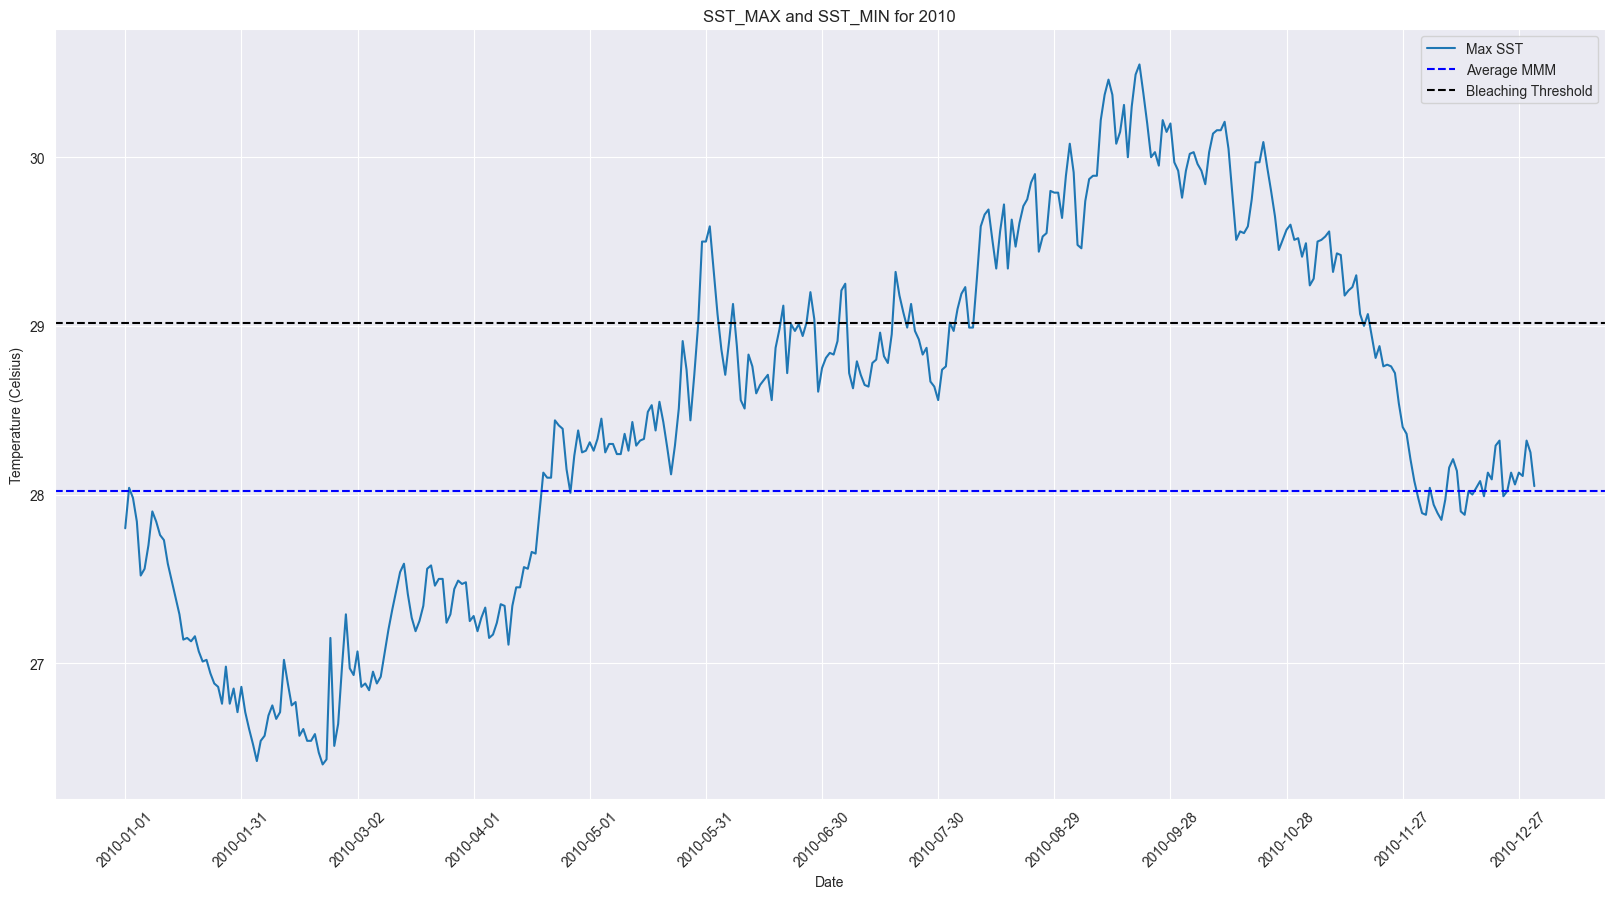

In [13]:
# Create a plot for the data, showing "SST_MAX" and "SST_MIN" for the years 2022-2023 on the same graph.
# Limit the x-axis to every month from January 2022 to December 2023.
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
plt.plot(df_2022_2023['YYYY-MM-DD'], df_2022_2023['SST_MAX'], label='Max SST')
#plt.plot(df_2022_2023['YYYY-MM-DD'], df_2022_2023['SST_MIN'], label='Min SST')
#plt.plot(df_2022_2023['YYYY-MM-DD'], df_2022_2023['SST_MEAN'], label='Mean SST')
# Add a horizontal line for the average_mmm
plt.axhline(y=average_mmm, color='b', linestyle='--', label='Average MMM')
plt.axhline(y=bleaching_threshold, color='black', linestyle='--', label='Bleaching Threshold')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title(f'SST_MAX and SST_MIN for {plot_names}')
plt.xticks(np.arange(0, len(df_2022_2023), 30), rotation=45)
plt.legend()
plt.show()

In [14]:
# Cycle through each row of the dataframe, starting at 83.
dhw = []

for i in range(len(df_2022_2023)):
    # If the row is less than 83, skip it.
    if i < 83:
        dhw.append(0.0)
        continue
    
    total_heat_stress = 0
    # Calculate the daily stress for each row.
    for j in range(83):
        # Subtract the bleaching threshold from the SST_MEAN for that row (i-j).
        daily_stress = df_2022_2023.iloc[i-j]['SST_MAX'] - average_mmm
        
        # If the daily stress is less than 0, set it to 0.
        if daily_stress < 1:
            daily_stress = 0
            
        # Add the daily stress to the total_heat_stress.
        total_heat_stress += daily_stress
    
    # Divide the total_heat_stress by 7 to get the weekly heat stress.
    dhw.append((total_heat_stress)/7)

In [15]:
# Add "dhw" list to the dataframe as a new column, labeled "DHW".
df_2022_2023['DHW'] = dhw
df_2022_2023.head()

14,YYYY-MM-DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max,SST_MEAN,DHW
9146,2010-01-01,25.40,27.80,27.6100,0.9668,0.0000,0.5871,0,26.600,0.0
9147,2010-01-02,25.67,28.04,27.8600,1.2113,0.0000,0.4371,0,26.855,0.0
9148,2010-01-03,25.71,27.98,27.9400,1.2535,0.0000,0.2943,0,26.845,0.0
9149,2010-01-04,25.22,27.84,27.7000,1.2061,0.0000,0.1429,0,26.530,0.0
9150,2010-01-05,25.23,27.52,27.4000,0.8916,0.0000,0.1429,0,26.375,0.0


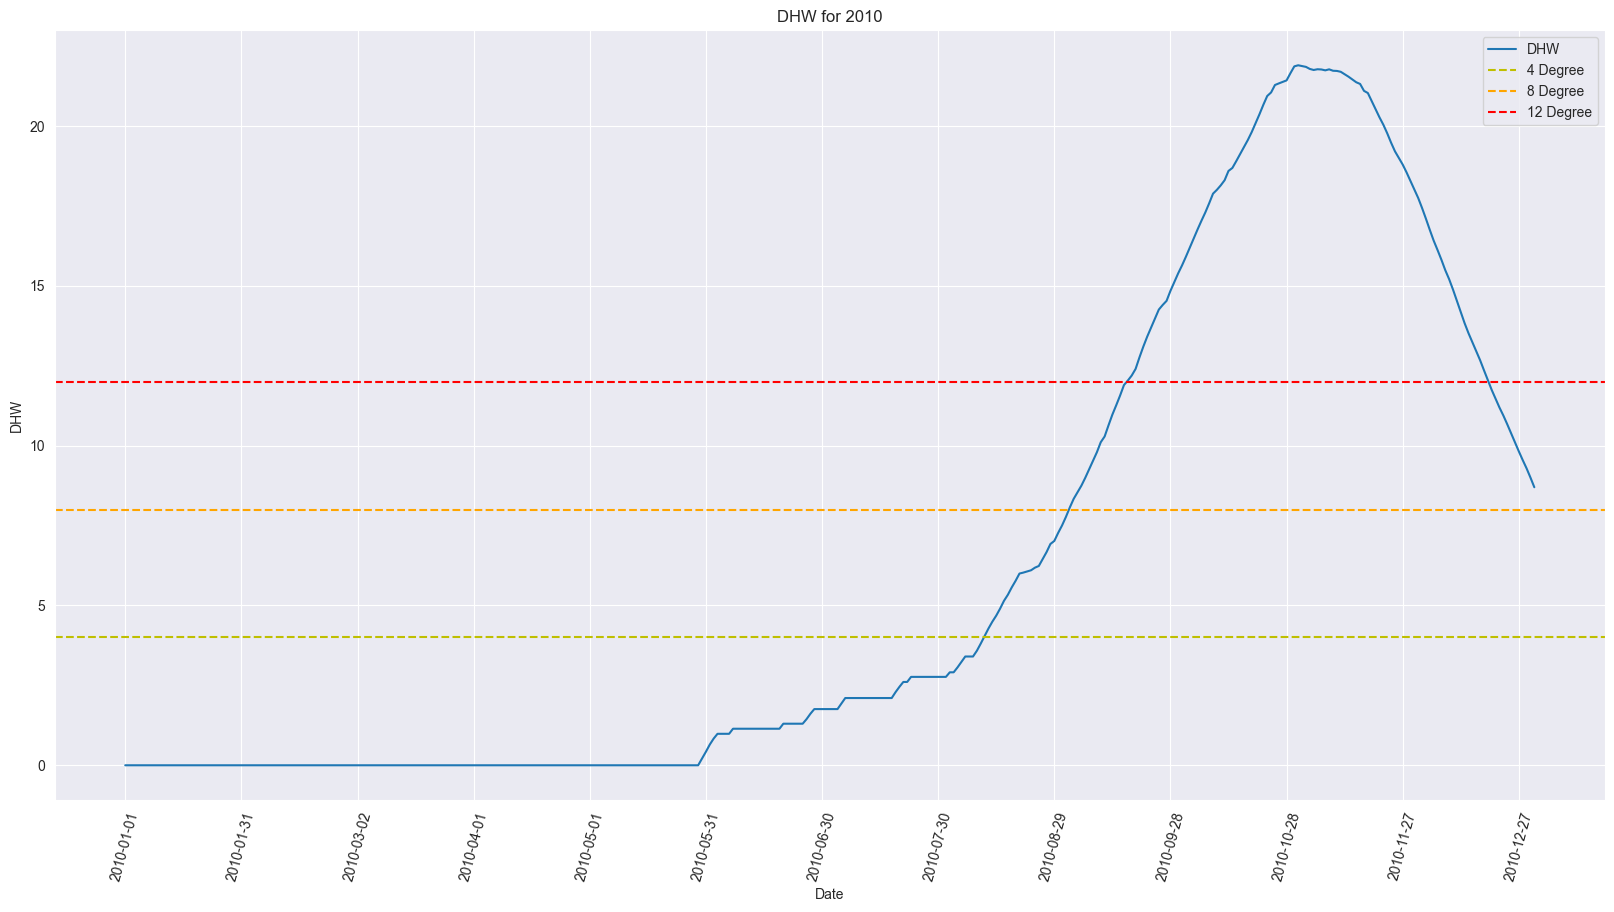

In [16]:
# Create a new graph, showing SST_MEAN and DHW for the years 2022-2023.
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
#plt.plot(df_2022_2023['YYYY-MM-DD'], df_2022_2023['SST_MEAN'], label='Mean SST')
plt.plot(df_2022_2023['YYYY-MM-DD'], df_2022_2023['DHW'], label='DHW')
#plt.axhline(y=average_mmm, color='b', linestyle='--', label='Average MMM')
#plt.axhline(y=bleaching_threshold, color='black', linestyle='--', label='Bleaching Threshold')
# Draw 4 and 8 and 12 degree lines, yellow orange red respectively
plt.axhline(y=4, color='y', linestyle='--', label='4 Degree')
plt.axhline(y=8, color='orange', linestyle='--', label='8 Degree')
plt.axhline(y=12, color='r', linestyle='--', label='12 Degree')
plt.xlabel('Date')
plt.ylabel('DHW')
plt.title(f'DHW for {plot_names}')
plt.xticks(np.arange(0, len(df_2022_2023), 30), rotation=75)
plt.legend()
plt.show()